In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
carretera = cv2.imread('../resources/img/carretera.png')

In [3]:
copia = np.copy(carretera)

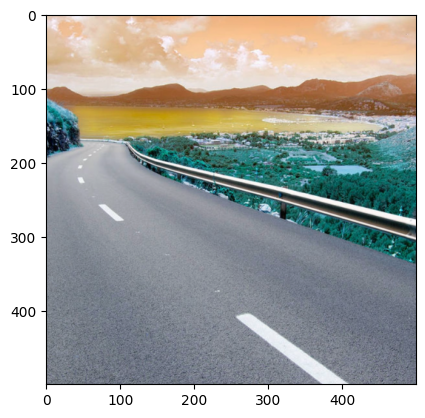

In [4]:
plt.imshow(copia)

In [5]:
carretera.shape[:2]

(500, 500)

In [6]:
imagen = np.zeros(carretera.shape[:2], dtype = np.int32)

In [7]:
segmentos = np.zeros(carretera.shape, dtype = np.uint8)

# Colores
https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [8]:
from matplotlib import cm
cm.tab10(0)

(np.float64(0.12156862745098039),
 np.float64(0.4666666666666667),
 np.float64(0.7058823529411765),
 np.float64(1.0))

### Convertimos los valores a valores legibles a GBR

In [9]:
np.array(cm.tab10(0)[:3]) * 255

array([ 31., 119., 180.])

In [10]:
def rgb(i):
    x = np.array(cm.tab10(i)[:3]) * 255
    return tuple(x)

In [11]:
colores = []

In [12]:
for i in range(10):
    colores.append(rgb(i))

In [13]:
colores

[(np.float64(31.0), np.float64(119.0), np.float64(180.0)),
 (np.float64(255.0), np.float64(127.0), np.float64(14.0)),
 (np.float64(44.0), np.float64(160.0), np.float64(44.0)),
 (np.float64(214.0), np.float64(39.0), np.float64(40.0)),
 (np.float64(148.0), np.float64(103.0), np.float64(189.0)),
 (np.float64(140.0), np.float64(86.0), np.float64(75.0)),
 (np.float64(227.0), np.float64(119.0), np.float64(194.0)),
 (np.float64(127.0), np.float64(127.0), np.float64(127.0)),
 (np.float64(188.0), np.float64(189.0), np.float64(34.0)),
 (np.float64(23.0), np.float64(190.0), np.float64(207.0))]

## Variables

In [14]:
marcador = 10
marcador_actual = 1
marcador_actualizado = False

## Funcion

In [15]:
def mouse(event, x, y, flags, param):
    global marcador_actualizado

    if event == cv2.EVENT_LBUTTONDOWN:
        #TRAKEAR
        cv2.circle(imagen, (x, y), 10, (marcador_actual), -1)
        #MOSTRAR
        cv2.circle(copia, (x, y), 10, colores[marcador_actual], -1)
        marcador_actualizado = True

## Bucle

In [16]:
cv2.namedWindow('Carretera')
cv2.setMouseCallback('Carretera', mouse)

while True:
    cv2.imshow('Segmentos', segmentos)
    cv2.imshow('Carretera', copia)

    #Cerrar
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    # Borrar Colores
    elif k == ord('c'):
        copia = carretera.copy()
        imagen = np.zeros(carretera.shape[:2], dtype = np.int32)
        segmentos = np.zeros(carretera.shape, dtype = np.uint8)
        
    #Actualizar
    elif k > 0 and chr(k).isdigit():
        marcador_actual = int(chr(k))
        
    #Actualizar Marcadores
    if marcador_actualizado:
        imagen_copia = imagen.copy()
        cv2.watershed(carretera, imagen_copia)
        
        segmentos = np.zeros(carretera.shape, dtype = np.uint8)

        for color_ind in range(marcador):
            segmentos[imagen_copia == (color_ind)] = colores[color_ind]
        marcador_actualizado = False

cv2.destroyAllWindows()